In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train2.zip to train2.zip


In [ ]:
import zipfile

In [ ]:
pwd

'/content'

In [ ]:
ls


drive/  sample_data/


In [ ]:
with zipfile.ZipFile("/content/drive/My Drive/train2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
import tensorflow as tf
import tensorflow.keras.preprocessing

# New Section

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory("train2",
                                                   labels="inferred",
                                                    label_mode="categorical",
                                                    color_mode="grayscale",
                                                    batch_size = 100,
                                                    seed = 42,
                                                    image_size= (50,50),
                                                    subset="training",
                                                    validation_split= 0.2)
                                                    

Found 50000 files belonging to 10 classes.
Using 40000 files for training.


In [ ]:
validation = tf.keras.preprocessing.image_dataset_from_directory("train2",
                                                   labels="inferred",
                                                    label_mode="categorical",
                                                    color_mode="grayscale",
                                                    batch_size = 100,
                                                    seed = 42,
                                                    image_size= (50,50),
                                                    subset="validation",
                                                    validation_split= 0.2)

Found 50000 files belonging to 10 classes.
Using 10000 files for validation.


In [ ]:
input_shape = list(validation)[0][0][0].shape

In [ ]:
input_shape

TensorShape([50, 50, 1])

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3),activation='relu',))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation="relu"))
model.add(Conv2D(128, (3, 3), padding='same',activation="relu"))

model.add(Conv2D(128, (3, 3), padding='same',activation="relu"))

model.add(Conv2D(256, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same',activation="relu"))

model.add(Conv2D(128, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="CategoricalCrossentropy", 
               optimizer=keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6), 
               metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 256)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
batch=256
#n_clases=10
epocas=100
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20,
    restore_best_weights=True
)

In [ ]:
history = model.fit(train, batch_size=batch, epochs=epocas, verbose=1, validation_data=validation,callbacks=[earlystopping])
model.save("/content/drive/My Drive/modelg4 ",save_format="h5")

Epoch 1/100
400/400 [==============================] - 38s 95ms/step - loss: 2.3023 - accuracy: 0.1704 - val_loss: 1.9548 - val_accuracy: 0.2856
Epoch 2/100
400/400 [==============================] - 38s 94ms/step - loss: 1.7935 - accuracy: 0.3580 - val_loss: 1.4423 - val_accuracy: 0.4832
Epoch 3/100
400/400 [==============================] - 38s 95ms/step - loss: 1.4220 - accuracy: 0.5048 - val_loss: 1.2460 - val_accuracy: 0.5554
Epoch 4/100
400/400 [==============================] - 37s 94ms/step - loss: 1.1417 - accuracy: 0.6054 - val_loss: 0.9866 - val_accuracy: 0.6626
Epoch 5/100
400/400 [==============================] - 38s 95ms/step - loss: 0.9605 - accuracy: 0.6725 - val_loss: 0.9365 - val_accuracy: 0.6811
Epoch 6/100
400/400 [==============================] - 38s 94ms/step - loss: 0.8345 - accuracy: 0.7131 - val_loss: 1.0393 - val_accuracy: 0.6666
Epoch 7/100
400/400 [==============================] - 38s 94ms/step - loss: 0.7286 - accuracy: 0.7526 - val_loss: 0.9802 - val_ac

In [ ]:
model.save("/content/drive/My Drive/modelg4",save_format="h5")

In [ ]:
acc=history.history['accuracy']
loss=history.history['loss']

epocas=range(len(acc))

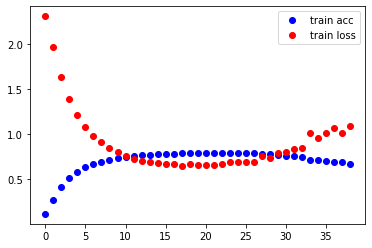

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epocas, acc, 'bo', label='train acc')
plt.plot(epocas, loss, 'ro', label='train loss')
plt.legend()
plt.show();

In [ ]:
acc=history.history['val_accuracy']
loss=history.history['val_loss']

epocas=range(len(acc))

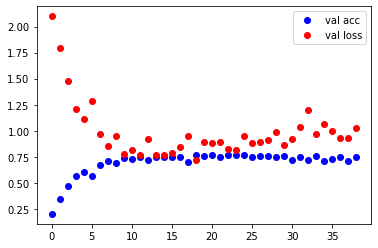

In [ ]:
plt.plot(epocas, acc, 'bo', label='val acc')
plt.plot(epocas, loss, 'ro', label='val loss')
plt.legend()
plt.show();

In [ ]:
from keras.models import load_model

model_gray1 = load_model("/content/drive/My Drive/modelg")

In [ ]:
model_gray1

In [ ]:
model_gray1.history

In [ ]:
acc=model_gray1.history['val_accuracy']
loss=model_gray1.history['val_loss']

epocas=range(len(acc))

TypeError: ignored

ValueError: ignored

100/100 [==============================] - 44s 438ms/step - loss: 1.1309 - accuracy: 0.6611
Test loss: 1.1308974027633667
Test accuracy: 0.6610999703407288


Found 50000 images belonging to 10 classes.


Found 50000 images belonging to 10 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
500/500 [==============================] - 137s 273ms/step - loss: 2.0283 - accuracy: 0.2707 - val_loss: 2.0356 - val_accuracy: 0.2627
Epoch 2/60
500/500 [==============================] - 136s 272ms/step - loss: 1.9804 - accuracy: 0.2818 - val_loss: 2.1322 - val_accuracy: 0.2141
Epoch 3/60
500/500 [==============================] - 135s 270ms/step - loss: 1.9388 - accuracy: 0.2961 - val_loss: 2.2838 - val_accuracy: 0.2440
Epoch 4/60
500/500 [==============================] - 136s 272ms/step - loss: 1.9077 - accuracy: 0.3063 - val_loss: 1.9517 - val_accuracy: 0.3037
Epoch 5/60
500/500 [==============================] - 136s 272ms/step - loss: 1.9197 - accuracy: 0.3056 - val_loss: 1.9034 - val_accuracy: 0.3190
Epoch 6/60
500/500 [==============================] - 136s 273ms/step - loss: 1.9240 - accuracy: 0.3043 - val_loss: 1.9240 - val_accuracy: 0.2984
Epoch 7/60
500/500 [============================

KeyboardInterrupt: ignored